# **Codig Dojo**: Proyecto 1
## Creado por: Alejandro Acosta

- Fecha de creación: 2022-01-22
- Fecha de modificación: 2022-01-16
- Descripción: Predicción de forecast de comida

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datawig
plt.rcParams['figure.dpi'] = 100


In [2]:
df = pd.read_csv('sales_predictions.csv')
# df['Item_Identifier'] = df.Item_Identifier.astype('category')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
print('Proporción datos Vacios')
df.isna().sum()/df.shape[0]

Proporción datos Vacios


Item_Identifier              0.000000
Item_Weight                  0.171653
Item_Fat_Content             0.000000
Item_Visibility              0.000000
Item_Type                    0.000000
Item_MRP                     0.000000
Outlet_Identifier            0.000000
Outlet_Establishment_Year    0.000000
Outlet_Size                  0.282764
Outlet_Location_Type         0.000000
Outlet_Type                  0.000000
Item_Outlet_Sales            0.000000
dtype: float64

In [5]:
df.corr().to_clipboard()
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [6]:
if True:
    # imputer1 = datawig.SimpleImputer(
    #     input_columns=['Item_Identifier','Item_Type'],
    #     output_column='Item_Weight',
    #     output_path='imputer_model1'
    #     )

    # imputer1.fit(train_df=df)
    # imputed1 = imputer1.predict(df)

    imputer2 = datawig.SimpleImputer(
        input_columns=['Item_Identifier'],
        output_column='Item_Weight',
        output_path='imputer_model2'
        )

    imputer2.fit(train_df=df)
    imputed2 = imputer2.predict(df)


2022-02-14 01:18:11,548 [INFO]  
========== start: fit model
2022-02-14 01:18:11,549 [WARNING]  Already bound, ignoring bind()
2022-02-14 01:18:12,455 [INFO]  Epoch[0] Batch [0-240]	Speed: 4272.27 samples/sec	cross-entropy=15.309500	Item_Weight-accuracy=0.000000
2022-02-14 01:18:13,327 [INFO]  Epoch[0] Train-cross-entropy=12.918702
2022-02-14 01:18:13,328 [INFO]  Epoch[0] Train-Item_Weight-accuracy=0.000000
2022-02-14 01:18:13,329 [INFO]  Epoch[0] Time cost=1.778
2022-02-14 01:18:13,334 [INFO]  Saved checkpoint to "imputer_model2\model-0000.params"
2022-02-14 01:18:13,467 [INFO]  Epoch[0] Validation-cross-entropy=14.920333
2022-02-14 01:18:13,468 [INFO]  Epoch[0] Validation-Item_Weight-accuracy=0.000000
2022-02-14 01:18:14,340 [INFO]  Epoch[1] Batch [0-240]	Speed: 4431.66 samples/sec	cross-entropy=11.534566	Item_Weight-accuracy=0.000000
2022-02-14 01:18:15,181 [INFO]  Epoch[1] Train-cross-entropy=9.848182
2022-02-14 01:18:15,181 [INFO]  Epoch[1] Train-Item_Weight-accuracy=0.000000
2022

In [7]:
# error1 = imputed1.dropna().Item_Weight - imputed1.dropna().Item_Weight_imputed
error2 = imputed2.dropna().Item_Weight - imputed2.dropna().Item_Weight_imputed


In [8]:
print(error2.mean())

0.021485734899757372


<AxesSubplot:ylabel='Count'>

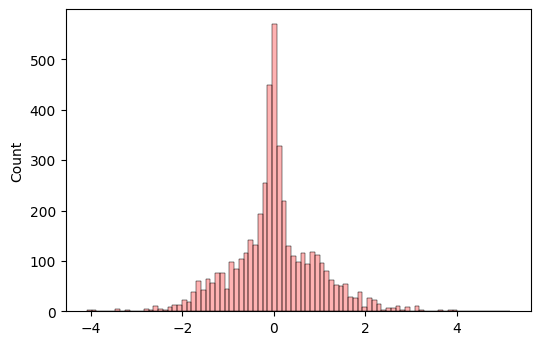

In [9]:
# sns.histplot(x=error1,color='blue', alpha=0.3)
sns.histplot(x=error2,color='red', alpha=0.3)

El error 2 promedio es mucho menor que el error 1, por lo tanto se utilizarán los valores inputados del modelo 2 que contiene solo la variable Item_Identifier como predictor del peso del producto

In [10]:
df['Item_Weight_imputed'] = np.where(df['Item_Weight'].isna(),imputed2['Item_Weight_imputed'],df['Item_Weight'])

In [11]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_imputed
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


In [12]:


# dft = df.groupby(['Outlet_Size','Outlet_Identifier'])['Item_Outlet_Sales'].sum()
# dft = pd.DataFrame(dft).reset_index()
# dft
# sns.histplot(data=dft, x='Item_Outlet_Sales', hue='Outlet_Size', element='step')
# sns.histplot(data=df, x='Item_Outlet_Sales', hue='Outlet_Size', element='step', bins=30)

In [13]:
# imputer3 = datawig.SimpleImputer(
#     input_columns=['Item_Outlet_Sales'],
#     output_column='Outlet_Size',
#     output_path='imputer_model3'
#     )

# imputer3.fit(train_df=df)
# imputed3 = imputer3.predict(df)

In [14]:
# imputed3

In [15]:
# df['Outlet_Size_imputed'] = np.where(df['Outlet_Size'].isna(),imputed3['Outlet_Size_imputed'],df['Outlet_Size'])

In [16]:
# pd.crosstab(df.Outlet_Size,imputed3.Outlet_Size_imputed, normalize=True, dropna=False)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Item_Weight_imputed        8523 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage:

## Visualizaciónes de la base

In [18]:
df.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [19]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_imputed
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.30
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,5.92
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,17.50
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.20
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,8.93


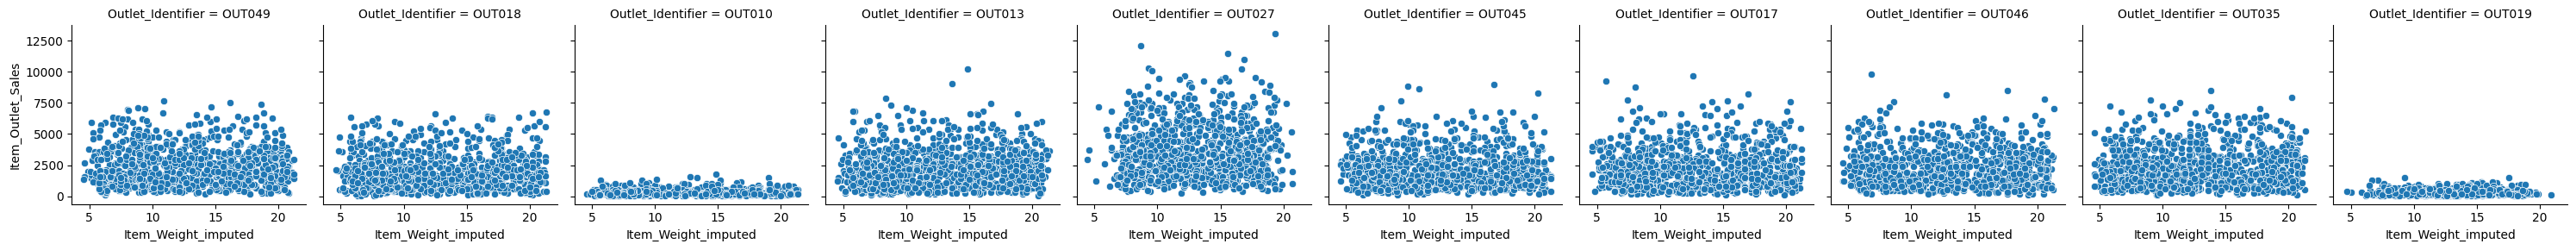

In [20]:
sns.set_palette('tab10')
g = sns.FacetGrid(data=df, col="Outlet_Identifier")
g.map(sns.scatterplot, 'Item_Weight_imputed', 'Item_Outlet_Sales')
plt.show()

## Estadística descriptiva

In [21]:
# se eliminan las variables que contienen vacios
df.dropna(axis=1, inplace=True)

In [22]:
df.Item_Fat_Content.unique()

# {'Low Fat', 'Regular', 'low fat', 'LF', 'reg'}

fatcat = {'Low Fat':'Low Fat', 'Regular':'Regular','low fat':'Low Fat', 'LF':'Low Fat', 'reg':'Regular'}
df.Item_Fat_Content = df.Item_Fat_Content.map(fatcat)

In [23]:
df.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

<AxesSubplot:>

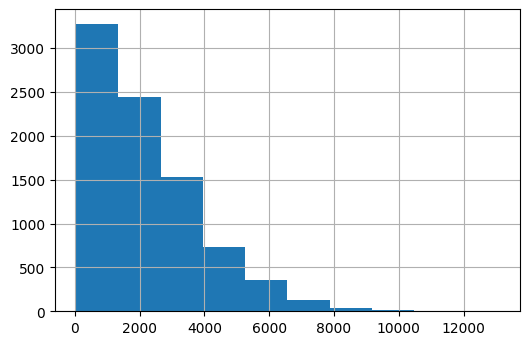

In [24]:
df.Item_Outlet_Sales.hist()

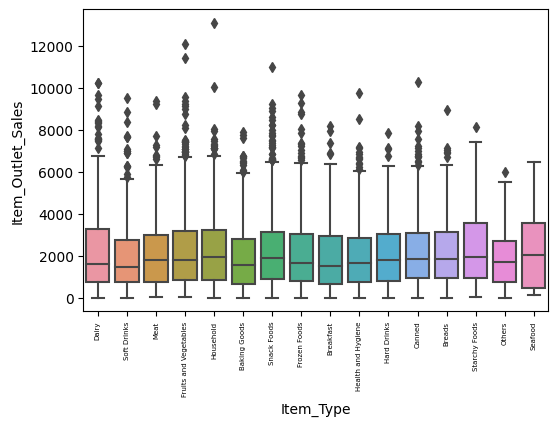

In [25]:
# Ventas por tipo de producto
ax = sns.boxplot(data=df, x='Item_Type', y='Item_Outlet_Sales')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=5)
plt.show()

# no se observa un patrón importante

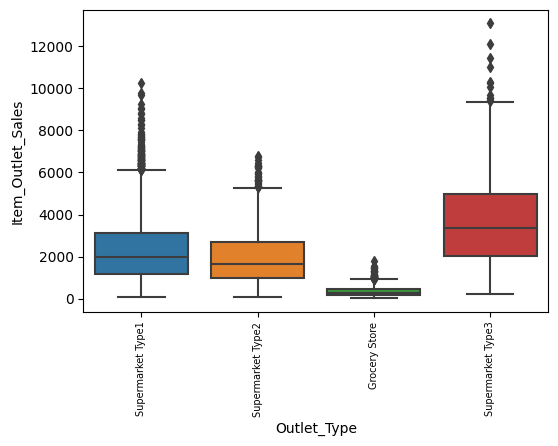

In [26]:
# Ventas por tipo de tipo de de Outlet
ax = sns.boxplot(data=df, x='Outlet_Type', y='Item_Outlet_Sales')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=7)
plt.show()

# si se observa una diferencia importante

## Regresión

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder, StandardScaler

from sklearn import preprocessing, neighbors 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import train_test_split 


In [28]:
df_bak = df.copy()

In [29]:
df = df_bak.copy()
df.columns = [i.lower() for i in df.columns]
df.drop('item_identifier', inplace=True, axis=1)

In [30]:
df.head()

,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales,item_weight_imputed
0,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,9.30
1,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228,5.92
2,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700,17.50
3,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800,19.20
4,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052,8.93


In [31]:
objects = df.select_dtypes(include=['object']).copy()
numeric0 = df.select_dtypes(include=['int','float']).drop('item_outlet_sales', axis=1).copy()

scaler = StandardScaler().fit(numeric0).transform(numeric0)
numeric = pd.DataFrame(scaler, columns=numeric0.columns)

In [32]:
{i:len(objects[i].unique()) for i in  objects.columns}

{'item_fat_content': 2,
 'item_type': 16,
 'outlet_identifier': 10,
 'outlet_location_type': 3,
 'outlet_type': 4}

In [33]:
# convertimos a variables categóricas todos los objetos
# Se utilizará label encoding
# otra opción sería dummificar todas las variables categóricas

for i in objects.columns:
    df[i] = df[i].astype('category')

l_encoder = LabelEncoder()
for cat_col in objects.columns:
    # Apply the encoder
    df[cat_col] = l_encoder.fit_transform(objects[cat_col])

for num_col in numeric.columns:
    # Apply the encoder
    df[num_col] = numeric[num_col]

In [34]:
df

,item_fat_content,item_visibility,item_type,item_mrp,outlet_identifier,outlet_establishment_year,outlet_location_type,outlet_type,item_outlet_sales,item_weight_imputed
0,0,-0.970732,4,1.747454,9,0.139541,0,1,3735.1380,-0.797837
1,1,-0.908111,14,-1.489023,3,1.334103,2,2,443.4228,-1.552659
2,0,-0.956917,10,0.010040,9,0.139541,0,1,2097.2700,1.033389
3,1,-1.281758,6,0.660050,0,0.020085,2,0,732.3800,1.413034
4,0,-1.281758,9,-1.399220,1,-1.293934,2,1,994.7052,-0.880465
...,...,...,...,...,...,...,...,...,...,...
8518,0,-0.181193,13,1.180783,1,-1.293934,2,1,2778.3834,-1.341621
8519,1,-0.371154,0,-0.527301,7,0.497909,1,1,549.2850,-1.003291
8520,0,-0.599784,8,-0.897208,6,0.736822,1,1,1193.1136,-0.507520
8521,1,1.532880,13,-0.607977,3,1.334103,2,2,1845.5976,-1.264576


In [35]:
X = df[[ 'item_fat_content', 'item_visibility', 'item_type',
       'item_mrp', 'outlet_identifier', 'outlet_establishment_year',
       'outlet_location_type', 'outlet_type',
       'item_weight_imputed']]
y = df['item_outlet_sales']

# 'item_identifier',

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [36]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

In [37]:
from sklearn.metrics import r2_score as r2

r2(y_train, knn.predict(X_train))

0.666825366335439

In [38]:
def knn_score(y, x, n=1):
    knn = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    return r2(y, knn.predict(x))

In [39]:
xaxis = range(1,51)

yaxis_train = [knn_score(y_train, X_train, n=i) for i in xaxis]
yaxis_test  = [knn_score(y_test, X_test, n=i)  for i in xaxis]

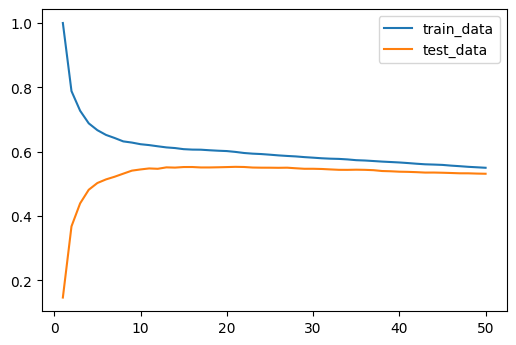

In [40]:
sns.lineplot(x=xaxis, y=yaxis_train)
sns.lineplot(x=xaxis, y=yaxis_test)
plt.legend(['train_data','test_data'])

In [41]:
best_n = np.where(yaxis_test==np.amax(yaxis_test))[0][0]
best_n

20

In [42]:
knn = KNeighborsRegressor(n_neighbors=best_n).fit(X_train, y_train)

In [43]:
knn.score(X_test, y_test)

0.5521138703081678

In [44]:
dummies = pd.get_dummies(objects, drop_first=True)
dummies

,item_fat_content_Regular,item_type_Breads,item_type_Breakfast,item_type_Canned,item_type_Dairy,item_type_Frozen Foods,item_type_Fruits and Vegetables,item_type_Hard Drinks,item_type_Health and Hygiene,item_type_Household,...,outlet_identifier_OUT027,outlet_identifier_OUT035,outlet_identifier_OUT045,outlet_identifier_OUT046,outlet_identifier_OUT049,outlet_location_type_Tier 2,outlet_location_type_Tier 3,outlet_type_Supermarket Type1,outlet_type_Supermarket Type2,outlet_type_Supermarket Type3
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
8519,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
8520,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0
8521,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [45]:
df1 = pd.concat([numeric0, dummies], axis=1)

df1['item_outlet_sales'] = df['item_outlet_sales']

df1

,item_visibility,item_mrp,outlet_establishment_year,item_weight_imputed,item_fat_content_Regular,item_type_Breads,item_type_Breakfast,item_type_Canned,item_type_Dairy,item_type_Frozen Foods,...,outlet_identifier_OUT035,outlet_identifier_OUT045,outlet_identifier_OUT046,outlet_identifier_OUT049,outlet_location_type_Tier 2,outlet_location_type_Tier 3,outlet_type_Supermarket Type1,outlet_type_Supermarket Type2,outlet_type_Supermarket Type3,item_outlet_sales
0,0.016047,249.8092,1999,9.300,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,3735.1380
1,0.019278,48.2692,2009,5.920,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,443.4228
2,0.016760,141.6180,1999,17.500,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,2097.2700
3,0.000000,182.0950,1998,19.200,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,732.3800
4,0.000000,53.8614,1987,8.930,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.056783,214.5218,1987,6.865,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,2778.3834
8519,0.046982,108.1570,2002,8.380,1,0,0,0,0,0,...,0,1,0,0,1,0,1,0,0,549.2850
8520,0.035186,85.1224,2004,10.600,0,0,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1193.1136
8521,0.145221,103.1332,2009,7.210,1,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1845.5976


In [46]:
from linearmodels import OLS

In [47]:
'+'.join(['item_fat_content', 'item_visibility', 'item_type',
       'item_mrp', 'outlet_identifier', 'outlet_establishment_year',
       'outlet_location_type', 'outlet_type', 'item_outlet_sales',
       'item_weight_imputed'])

'item_fat_content+item_visibility+item_type+item_mrp+outlet_identifier+outlet_establishment_year+outlet_location_type+outlet_type+item_outlet_sales+item_weight_imputed'

In [53]:
df3 = df_bak.copy()
df3.columns = [i.lower() for i in df3.columns]
OLS.from_formula('item_outlet_sales ~ 1+item_fat_content+item_visibility+item_type+item_mrp+outlet_location_type+outlet_type+item_weight_imputed', data=df3).fit()

OLS Estimation Summary                            
==============================================================================
Dep. Variable:      item_outlet_sales   R-squared:                      0.5626
Estimator:                        OLS   Adj. R-squared:                 0.5614
No. Observations:                8523   F-statistic:                    8409.4
Date:                Mon, Feb 14 2022   P-value (F-stat)                0.0000
Time:                        01:30:42   Distribution:                 chi2(24)
Cov. Estimator:                robust                                         
                                                                              
                                         Parameter Estimates                                          
======================================================================================================
                                    Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------------------------
Intercept                             -1813.7     71.181    -25.480     0.0000     -1953.2     -1674.2
item_fat_content[T.Regular]            40.848     28.434     1.4366     0.1508     -14.882      96.578
item_mrp                               15.565     0.2270     68.568     0.0000      15.120      16.010
item_type[T.Breads]                    2.9959     78.494     0.0382     0.9696     -150.85      156.84
item_type[T.Breakfast]                 10.082     125.24     0.0805     0.9358     -235.38      255.55
item_type[T.Canned]                    26.247     57.358     0.4576     0.6472     -86.171      138.67
item_type[T.Dairy]                    -39.968     61.906    -0.6456     0.5185     -161.30      81.367
item_type[T.Frozen Foods]             -25.977     54.280    -0.4786     0.6322     -132.36      80.411
item_type[T.Fruits and Vegetables]     29.010     51.722     0.5609     0.5749     -72.364      130.38
item_type[T.Hard Drinks]              -0.2410     84.277    -0.0029     0.9977     -165.42      164.94
item_type[T.Health and Hygiene]       -10.788     61.091    -0.1766     0.8598     -130.52      108.95
item_type[T.Household]                -39.297     56.460    -0.6960     0.4864     -149.96      71.362
item_type[T.Meat]                      2.0348     66.095     0.0308     0.9754     -127.51      131.58
item_type[T.Others]                   -26.008     83.113    -0.3129     0.7543     -188.91      136.89
item_type[T.Seafood]                   182.14     165.68     1.0993     0.2716     -142.59      506.87
item_type[T.Snack Foods]              -9.9103     52.164    -0.1900     0.8493     -112.15      92.330
item_type[T.Soft Drinks]              -26.328     67.373    -0.3908     0.6960     -158.38      105.72
item_type[T.Starchy Foods]             24.378     109.44     0.2228     0.8237     -190.11      238.87
item_visibility                       -298.64     230.29    -1.2968     0.1947     -750.00      152.72
item_weight_imputed                    0.1583     2.7167     0.0583     0.9535     -5.1664      5.4829
outlet_location_type[T.Tier 2]         10.768     31.984     0.3367     0.7364     -51.921      73.456
outlet_location_type[T.Tier 3]        -17.920     34.382    -0.5212     0.6022     -85.308      49.468
outlet_type[T.Supermarket Type1]       1937.0     34.808     55.649     0.0000      1868.8      2005.2
outlet_type[T.Supermarket Type2]       1628.7     46.284     35.189     0.0000      1538.0      1719.4
outlet_type[T.Supermarket Type3]       3355.6     60.019     55.909     0.0000      3238.0      3473.2
======================================================================================================
OLSResults, id: 0x20a503130d0

El mejor predictor de las ventas es el MRP del item y el tipo de outlet en el que se vende.  
Eliminando el código de producto como predictor, la predicción mejoró.  
Se podría hacer un grid search para incluir interacciones y seleccionar las variables que mejor predigan el modelo.

df.info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   item_fat_content           8523 non-null   int32  
 1   item_visibility            8523 non-null   float64
 2   item_type                  8523 non-null   int32  
 3   item_mrp                   8523 non-null   float64
 4   outlet_identifier          8523 non-null   int32  
 5   outlet_establishment_year  8523 non-null   float64
 6   outlet_location_type       8523 non-null   int32  
 7   outlet_type                8523 non-null   int32  
 8   item_outlet_sales          8523 non-null   float64
 9   item_weight_imputed        8523 non-null   float64
dtypes: float64(5), int32(5)
memory usage: 499.5 KB
